In [32]:
from ensemble_fns import (adaboost,
                          adaboost_pred,
                          adaboost_acc,
                          random_forest, 
                          bagging, 
                          forest_pred,
                          forest_acc)
import sys
sys.path.append('..')
from datasets import get_bank_data
from decision_tree_fns import predict, tree_maker
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
train_fp = '../datasets/bank/train.csv'
test_fp = '../datsets/bank/test.csv'
train,test,feat_names = get_bank_data() # converts median to binary
X_train,y_train = train
X_test,y_test = test

### 2a. adaboost!

In [69]:
for num_stumps in range(1,502,50):
    forest = adaboost(X_train, y_train, feat_names, num_stumps=num_stumps)
    with open(f'./2a/bank_forest_{num_stumps}.pkl','wb') as f:
        pickle.dump(forest, f)

KeyboardInterrupt: 

In [67]:
forests = []
forest_files = os.listdir('2a')
forest_files.sort()
forest_files = np.insert(forest_files, 1, forest_files[-1])[:-1] # fix order from directory
print(forest_files)
for forest_file in forest_files:
    with open(os.path.join('2a', forest_file), 'rb') as f:
        forests.append(pickle.load(f))

['bank_forest_1.pkl' 'bank_forest_51.pkl' 'bank_forest_101.pkl'
 'bank_forest_151.pkl' 'bank_forest_201.pkl' 'bank_forest_251.pkl'
 'bank_forest_301.pkl' 'bank_forest_351.pkl' 'bank_forest_401.pkl'
 'bank_forest_451.pkl' 'bank_forest_501.pkl']


In [70]:
ada_accs = np.zeros((len(forests), 2))
    
for i, forest in enumerate(forests):
    print(i, end=",")
    stumps, amount_of_says = forest
    train_acc = adaboost_acc(X_train,y_train,stumps,feat_names, amount_of_says)
    test_acc = adaboost_acc(X_test,y_test,stumps,feat_names, amount_of_says)
    ada_accs[i] = train_acc, test_acc

0,1,2,3,4,5,6,7,8,9,10,

In [71]:
[print(f'train_acc, test_acc for ada w/ {list(range(1,502,50))[i]} stumps: {ada_accs[i]} \n') for i in range(len(ada_accs))]
print('all the trees are all just predicting no b/c if the branch is not pure, then we choose the mode of the labels?')

train_acc, test_acc for ada w/ 1 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 51 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 101 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 151 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 201 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 251 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 301 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 351 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 401 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 451 stumps: [0.8808 0.8752] 

train_acc, test_acc for ada w/ 501 stumps: [0.8808 0.8752] 

all the trees are all just predicting no b/c if the branch is not pure, then we choose the mode of the labels?


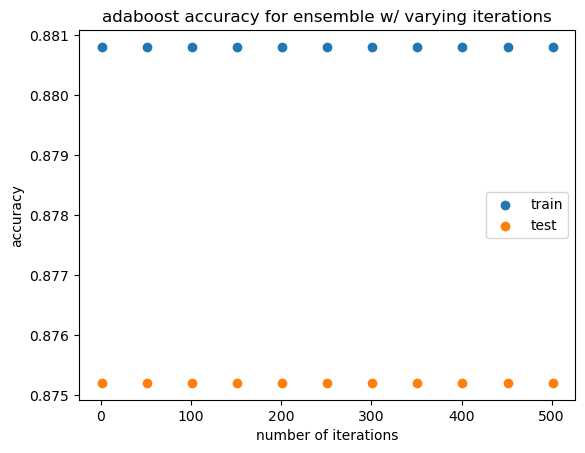

In [72]:
plt.scatter(list(range(1,502,50)), ada_accs[:,0],label='train')
plt.scatter(list(range(1,502,50)), ada_accs[:,1],label='test')
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.title('adaboost accuracy for ensemble w/ varying iterations')
plt.savefig('adaboost_acc_2a_1')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

NameError: name 'stump_acc' is not defined

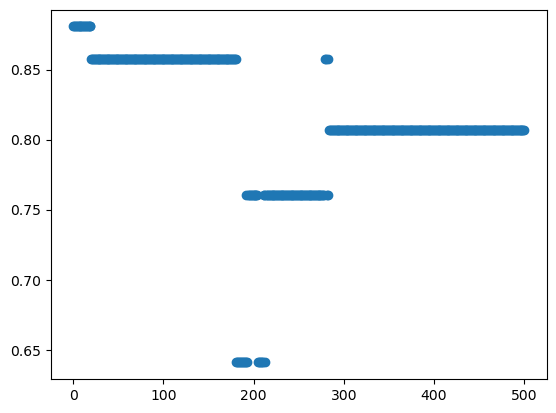

In [45]:
## calculate decision stump accuracy for each stump in 501 itr ensemble
with open('./2a/bank_forest_501.pkl', 'rb') as f:
    stumps,_ = pickle.load(f)
stumps_acc = np.zeros((len(stumps), 2))  
for i, stump in enumerate(stumps):
    print(i, end=",")
    train_acc = (y_train == [predict(X_train[ex],stump,feat_names) for ex in range(len(X_train))]).mean()
    test_acc = (y_test == [predict(X_test[ex],stump,feat_names) for ex in range(len(X_test))]).mean()
    stumps_acc[i] = train_acc, test_acc
    

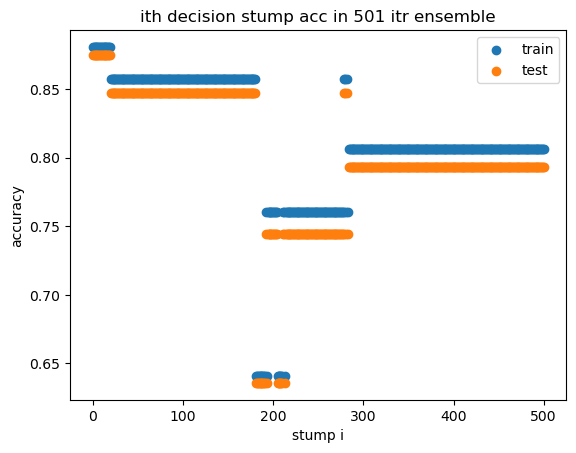

In [46]:
plt.scatter(range(len(stumps)), stumps_acc[:,0],label='train')
plt.scatter(range(len(stumps)), stumps_acc[:,1],label='test')
plt.legend()
plt.xlabel('stump i')
plt.ylabel('accuracy')
plt.title('ith decision stump acc in 501 itr ensemble')
plt.savefig('adaboost_acc_2a_2')

### 2b, creating and evaluating bagged forests

In [225]:
### creating bagged forests and saving to .pkl files for easy loading
for tree_count in range(1,502,50):
    forest = bagging(X_train, y_train, feat_names, tree_count=tree_count, max_depth=100) # each bagged forest is a list of trees
    with open(f'./2b/bank_forest_{tree_count}.pkl','wb') as f:
        pickle.dump(forest, f)

In [75]:
### loading bagged forests from .pkl files in corect order 
bagged_forests = []
for tree_count in range(1,502,50):
    with open(f'./2b/bank_forest_{tree_count}.pkl', 'rb') as f:
        bagged_forests.append(pickle.load(f))

In [76]:
# garnering train/test accuracies from the bagged forests we made
accs = np.zeros((len(bagged_forests), 2))
for i, forest in enumerate(bagged_forests):
    print(i, end=",")
    train_acc = forest_acc(X_train,y_train,forest,feat_names)
    test_acc = forest_acc(X_test,y_test,forest,feat_names)
    accs[i] = train_acc, test_acc

0,1,2,3,4,5,6,7,8,9,10,

In [77]:
[print(f'train acc, test acc for bagged forests, {list(range(1,502,50))[i]}: {accs[i]} \n') for i in range(len(accs))]

train acc, test acc for bagged forests, 1: [0.79458688 0.7919056 ] 

train acc, test acc for bagged forests, 51: [0.79900416 0.81081568] 

train acc, test acc for bagged forests, 101: [0.79900416 0.81126592] 

train acc, test acc for bagged forests, 151: [0.7985472  0.81051552] 

train acc, test acc for bagged forests, 201: [0.79885184 0.81156608] 

train acc, test acc for bagged forests, 251: [0.79885184 0.81126592] 

train acc, test acc for bagged forests, 301: [0.79885184 0.81111584] 

train acc, test acc for bagged forests, 351: [0.79885184 0.81111584] 

train acc, test acc for bagged forests, 401: [0.79885184 0.81111584] 

train acc, test acc for bagged forests, 451: [0.79885184 0.81171616] 

train acc, test acc for bagged forests, 501: [0.79885184 0.81051552] 



[None, None, None, None, None, None, None, None, None, None, None]

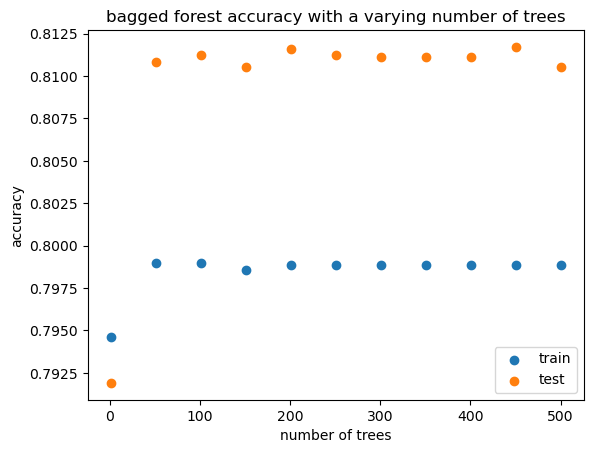

In [78]:
plt.scatter(list(range(1,502,50)), accs[:,0],label='train')
plt.scatter(list(range(1,502,50)), accs[:,1],label='test')
plt.legend()
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('bagged forest accuracy with a varying number of trees')
plt.savefig('bagged_acc_2b_1')

### 2c, creating bagged forests calc bias/variance decomp 

In [53]:
# creating 100 bagged forests from random 1000 example subsets of training data and saving to .pkl files for easy loading
np.random.seed(seed=1)
tree_count=500
for i in range(1,100):
    print(i, end=",")
    subi = np.random.choice(len(X_train), size=1000, replace=False)
    # be careful that columns of X_train[subi] 
    # might not have all the feature values that X_train/X_test does, so call tree maker 
    # instead of bagging so that we can input the original X_train/y_train for the sake of having
    # all the feature values (this was a bug that took me awhile to catch) 
    forest = [tree_maker(X_train[subi], y_train[subi], 
                        X_train, y_train,
                        feat_names,
                        max_depth=100,
                        IG_metric='entropy',
                        attr_subset_len=X_train.shape[1]) for i in range(tree_count)]
    with open(f'./2c/bank_forest_{i}.pkl','wb') as f:
        pickle.dump(forest, f)

# 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32 itrs
# this was taking way too long, so compute bias/variance params on the 30 trees

32,33,

KeyboardInterrupt: 

In [82]:
### loading bagged forests from .pkl files
bagged_forests_2c = []
for i in range(30):
    with open(f'./2c/bank_forest_{i}.pkl', 'rb') as f:
        bagged_forests_2c.append(pickle.load(f))

In [89]:
# get 1st tree in each bagged predictor 
trees = [forest[0] for forest in bagged_forests_2c]
# calculate accuracies on train/test set
predictions_across_trees = np.zeros((len(trees), len(X_test)))
for i, tree in enumerate(trees):
    print(i, end=",")
    preds = np.array([predict(ex, tree, feat_names) for ex in X_test])
    preds = np.where(preds == 'yes',1,0)
    predictions_across_trees[i,:] = np.array(preds)


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [90]:
# bias and sample var metrics across trees (rows/axis=0)
avg_trees_preds = predictions_across_trees.mean(axis=0) # len(X_test)
y_test_01 = preds = np.where(preds == 'yes',1,0)
bias_term = (avg_trees_preds - y_test_01)**2 # len
sample_var = (1/(len(trees) - 1))*((predictions_across_trees - avg_trees_preds)**2).sum(axis=0)
final_tree_bias = bias_term.mean()
final_sample_var = sample_var.mean()
general_squared_error = final_tree_bias + final_sample_var

In [92]:
print('2c for single trees')
print(f'{final_tree_bias=},{final_sample_var=},{general_squared_error=}')

2c for single trees
final_tree_bias=0.031358666666666674,final_sample_var=0.0768703448275862,general_squared_error=0.10822901149425287


In [105]:
# same thing with bagged predictors 
predictions_across_forests = np.zeros((len(bagged_forests_2c), len(X_test)))
for i, forest in enumerate(bagged_forests_2c):
    print(i, end=",")
    preds = np.array([forest_pred(ex, forest, feat_names) for ex in X_test])
    preds = np.where(preds == 'yes',1,0)
    predictions_across_forests[i,:] = np.array(preds)
    

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [106]:
# take metrics across forests (rows/axis=0)
avg_forests_preds = predictions_across_forests.mean(axis=0) # len(X_test)
y_test_01 = preds = np.where(preds == 'yes',1,0)
bias_term = (avg_forests_preds - y_test_01)**2 # len
sample_var = (1/(len(forests) - 1))*((predictions_across_forests - avg_forests_preds)**2).sum(axis=0)
final_forest_bias = bias_term.mean()
final_forest_sample_var = sample_var.mean()
forest_general_squared_error = final_forest_bias + final_forest_sample_var

In [107]:
print('2c for bagged forests')
print(f'{final_forest_bias=},{final_forest_sample_var=},{forest_general_squared_error=}')

2c for bagged forests
final_forest_bias=0.031358666666666674,final_forest_sample_var=0.22292399999999998,forest_general_squared_error=0.25428266666666666


### 2d creating and evaluating Random Forests

In [ ]:
# 2d
### creating random forests w/ different tree counts and different numbers of feature subsets (attr_subset_len) of [2,4,6]
### to use when deciding on the next split
### and saving to .pkl files for easy loading
np.random.seed(seed=0)
for sub in [2,4,6]:
    for tree_count in range(1,502,50):
        forest = random_forest(X_train, 
                               y_train, 
                               feat_names,
                               tree_count=tree_count, 
                               max_depth=100,
                               attr_subset_len=sub)
        
        with open(f'./2d/bank_random_forest_{tree_count}_{sub}.pkl','wb') as f:
            pickle.dump(forest, f)

In [109]:
### loading random forests from .pkl files in corect order 
random_forests = []
for sub in [2,4,6]:
    for tree_count in range(1,502,50):
        with open(f'./2d/bank_random_forest_{tree_count}_{sub}.pkl', 'rb') as f:
            random_forests.append(pickle.load(f))


In [110]:
print(len(random_forests))

33


In [111]:
rf_accs = np.zeros((len(random_forests), 2))

for i, forest in enumerate(random_forests):
    print(i, end=",")
    train_acc = forest_acc(X_train,y_train,forest,feat_names)
    test_acc = forest_acc(X_test,y_test,forest,feat_names)
    rf_accs[i] = train_acc, test_acc

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,

In [ ]:
# rf_accs for subset 2
sub_sep = len(list(range(1,502,50)))
sub2,sub4,sub6 = rf_accs[:sub_sep], rf_accs[sub_sep:sub_sep*2], rf_accs[sub_sep*2:]


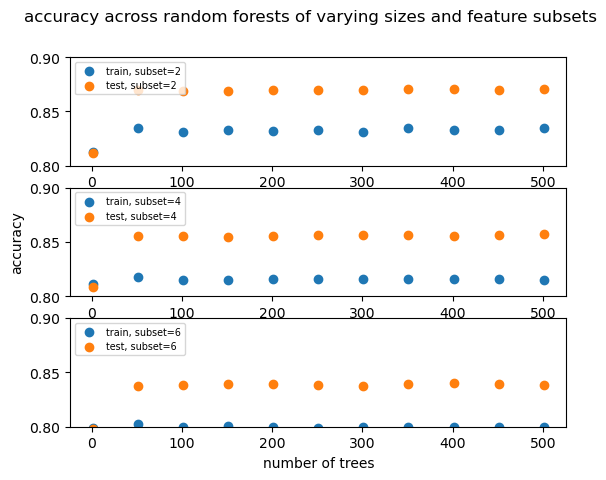

In [165]:

fig,ax = plt.subplots(3)
ax[0].scatter(list(range(1,502,50)), sub2[:,0],label='train, subset=2')
ax[0].scatter(list(range(1,502,50)), sub2[:,1],label='test, subset=2')

ax[1].set_ylabel('accuracy')
ax[2].set_xlabel('number of trees')
fig.suptitle('accuracy across random forests of varying sizes and feature subsets')

ax[1].scatter(list(range(1,502,50)), sub4[:,0],label='train, subset=4')
ax[1].scatter(list(range(1,502,50)), sub4[:,1],label='test, subset=4')

ax[2].scatter(list(range(1,502,50)), sub6[:,0],label='train, subset=6')
ax[2].scatter(list(range(1,502,50)), sub6[:,1],label='test, subset=6')

ax[0].set_ylim(0.8,0.9)
ax[1].set_ylim(0.8,0.9)
ax[2].set_ylim(0.8,0.9)

ax[0].legend(fontsize='x-small',loc='upper left')
ax[1].legend(fontsize='x-small',loc='upper left')
ax[2].legend(fontsize='x-small',loc='upper left')

plt.savefig('random_forest_acc_2d')


In [168]:
print('random forest train/test accs across varying tree counts 1,51,101,151,...,501, and feature subset of 2\n', sub2)


random forest train/test accs across varying tree counts 1,51,101,151,...,501, and feature subset of 2
 [[0.81316992 0.81171616]
 [0.835104   0.86964704]
 [0.83068672 0.86859648]
 [0.83251456 0.86904672]
 [0.83160064 0.86979712]
 [0.83312384 0.87009728]
 [0.83114368 0.86934688]
 [0.83479936 0.87024736]
 [0.83312384 0.87024736]
 [0.83312384 0.8699472 ]
 [0.835104   0.87039744]]


### 2e, creating random forests for calc bias/variance decomp 

In [100]:
np.random.seed(seed=1)
tree_count=500
for i in range(1,100):
    print(i, end=",")
    subi = np.random.choice(len(X_train), size=1000, replace=False)
    # be careful that columns of X_train[subi] 
    # might not have all the feature values that X_train/X_test does, so call tree maker 
    # instead of bagging so that we can input the original X_train/y_train for the sake of having
    # all the feature values (this was a bug that took me awhile to catch) 
    forest = [tree_maker(X_train[subi], y_train[subi], 
                        X_train, y_train,
                        feat_names,
                        max_depth=100,
                        IG_metric='entropy',
                        attr_subset_len=2) for i in range(tree_count)]
    with open(f'./2e/bank_forest_{i}.pkl','wb') as f:
        pickle.dump(forest, f)


17,

KeyboardInterrupt: 

In [169]:
### loading random forests from .pkl files in corect order 
random_forests2 = []
for i in range(17):
    with open(f'./2e/bank_forest_{i}.pkl', 'rb') as f:
        random_forests2.append(pickle.load(f))

In [170]:
# get 1st tree in each bagged predictor 
trees = [forest[0] for forest in random_forests2]
# calculate accuracies on train/test set
predictions_across_trees = np.zeros((len(trees), len(X_test)))
for i, tree in enumerate(trees):
    print(i, end=",")
    preds = np.array([predict(ex, tree, feat_names) for ex in X_test])
    preds = np.where(preds == 'yes',1,0)
    predictions_across_trees[i,:] = np.array(preds)


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,

In [171]:
# bias and sample var metrics across trees (rows/axis=0)
avg_trees_preds = predictions_across_trees.mean(axis=0) # len(X_test)
y_test_01 = preds = np.where(preds == 'yes',1,0)
bias_term = (avg_trees_preds - y_test_01)**2 # len
sample_var = (1/(len(trees) - 1))*((predictions_across_trees - avg_trees_preds)**2).sum(axis=0)
final_tree_bias = bias_term.mean()
final_sample_var = sample_var.mean()
general_squared_error = final_tree_bias + final_sample_var

In [177]:
print('2e for single trees')
print(f'{final_tree_bias=},{final_sample_var=},{general_squared_error=}')

2e for single trees
final_tree_bias=0.013993079584775088,final_sample_var=0.06453235294117646,general_squared_error=0.07852543252595154


In [174]:
# same thing with random forest predictors 
predictions_across_forests = np.zeros((len(random_forests2), len(X_test)))
for i, forest in enumerate(random_forests2):
    print(i, end=",")
    preds = np.array([forest_pred(ex, forest, feat_names) for ex in X_test])
    preds = np.where(preds == 'yes',1,0)
    predictions_across_forests[i,:] = np.array(preds)
    

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,

In [175]:
# take metrics across forests (rows/axis=0)
avg_forests_preds = predictions_across_forests.mean(axis=0) # len(X_test)
y_test_01 = preds = np.where(preds == 'yes',1,0)
bias_term = (avg_forests_preds - y_test_01)**2 # len
sample_var = (1/(len(forests) - 1))*((predictions_across_forests - avg_forests_preds)**2).sum(axis=0)
final_forest_bias = bias_term.mean()
final_forest_sample_var = sample_var.mean()
forest_general_squared_error = final_forest_bias + final_forest_sample_var

In [176]:
print('2e for random forests')
print(f'{final_forest_bias=},{final_forest_sample_var=},{forest_general_squared_error=}')

2e for random forests
final_forest_bias=0.00258961937716263,final_forest_sample_var=0.017477647058823532,forest_general_squared_error=0.02006726643598616
